In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv('PL_player_1920.csv')
df = data.iloc[:,1:]

## position 

In [3]:
position_list = list()
for i in range(276):
    po=df['position'][i].split(',')
    for j in range(len(po)):
        if po[j] not in position_list:
            position_list.append(po[j])

In [4]:
multi_position_list = list()
for i in range(276):
    po=df['position'][i]
    if po not in multi_position_list:
            multi_position_list.append(po)

In [5]:
def position_class(pos):
    position = list()
    for i in pos:
        if 'FW' in i:
            if ('AM' in i) or ('M' in i):
                position.append('AM/FW')
            else:
                position.append('FW')
        elif 'AM' in i:
            position.append('AM')
        elif 'M' in i:
            if 'D' in i:
                position.append('DM/WB')
            else :  position.append('M')
        elif 'D' in i:
            position.append('D')
        elif 'GK' in i:
            position.append('GK')
        else :
            position.append('??')
    return(position)

In [6]:
multi_position_class = list()
for i in range(49):
    po=position_class(multi_position_list)[i]
    multi_position_class.append(po)

In [7]:
df.position=position_class(data.position)
goal_assist= df['Goals']+df['Assists']
df['goal_assist'] = goal_assist

In [8]:
df = df.sort_values('position')

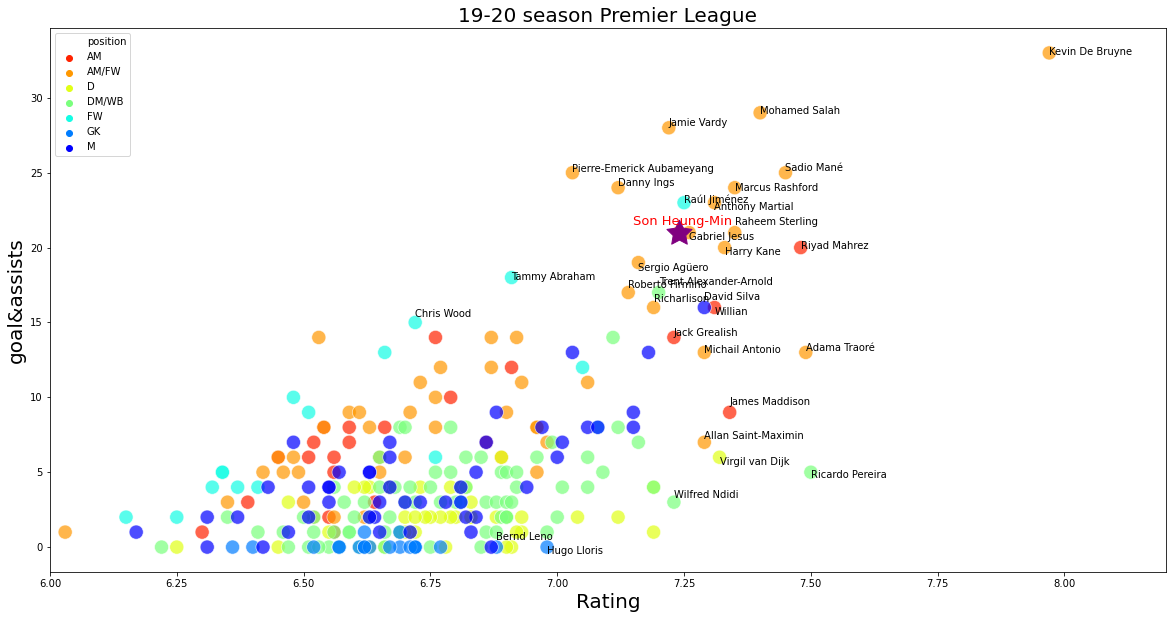

In [57]:
fig = plt.figure(figsize = (20,10))
sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', data=df, s=200, alpha=0.7)
for i in range(len(df['player_name'])):
    if df['player_name'][i] == 'Son Heung-Min':
        plt.text((df['Rating'][i]-0.09),(df['goal_assist'][i]+0.5),df['player_name'][i], color='red', 
                 fontsize = 13)
    elif df['player_name'][i] in ['Willian', 'Gabriel Jesus','Anthony Martial','Harry Kane']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]-0.5),df['player_name'][i])
    elif df['player_name'][i] in ['Raheem Sterling', 'Trent Alexander-Arnold', 'David Silva']:
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+0.5),df['player_name'][i])
    elif (df['goal_assist'][i] >= 15) or (df['Rating'][i]>7.2): 
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
    elif (df['position'][i]=='GK') and (df['Rating'][i]>6.8):
        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
temp = df[df['player_name']=='Son Heung-Min']
plt.scatter(temp['Rating'], temp['goal_assist'], marker=(5, 1), s=700, color='purple')
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylabel('goal&assists',fontsize=20)
plt.xlabel('Rating',fontsize=20)
fig.savefig('son_19.20_PL.png')

In [320]:
data2 = pd.read_csv('PL_player_1819.csv')
df2 = data2.iloc[:,1:]

In [321]:
df2

,player_name,team_number,team_name,Apps,Mins,Goals,Assists,Yel,Red,SpG,...,Clear,Drb,Blocks,OwnG,Dribble,Fouled,Off,Disp,UnsTch,sub
0,Eden Hazard,15,Chelsea,32,2926,16,15,2,0,2.5,...,0.1,0.3,0.0,0,3.7,2.8,0.3,2.3,2.4,5
1,Raheem Sterling,167,Man City,31,2777,17,10,3,0,2.3,...,0.1,0.5,0.1,0,2.4,1.3,0.4,2.6,2.2,3
2,Mohamed Salah,26,Liverpool,37,3262,22,8,1,0,3.6,...,0.1,0.3,0.0,0,2.1,0.8,0.7,3.1,2.9,1
3,Sergio Agüero,167,Man City,31,2480,21,8,3,0,3.6,...,0.1,0.1,0.0,0,1.4,0.8,0.8,1.6,2.2,2
4,Virgil van Dijk,26,Liverpool,38,3385,4,2,1,0,0.8,...,5.2,0.0,0.5,0,0.2,0.6,0.0,0.0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,Morgan Gibbs-White,161,Wolves,5,651,0,1,1,0,0.3,...,0.0,0.1,0.0,0,0.5,0.2,0.1,0.6,0.9,21
277,Elias Kachunga,166,Huddersfield,13,1182,0,0,2,0,0.7,...,0.5,0.8,0.1,0,0.5,1.1,0.5,1.0,1.1,7
278,Isaac Mbenza,166,Huddersfield,10,984,1,1,1,0,0.7,...,0.2,0.1,0.0,0,0.2,0.2,0.2,0.5,0.8,12
279,Lys Mousset,183,Bournemouth,1,351,1,0,1,0,0.5,...,0.1,0.1,0.0,0,0.4,0.2,0.2,0.2,0.8,23


In [322]:
df2.position=position_class(data2.position)
goal_assist= df2['Goals']+df2['Assists']
df2['goal_assist'] = goal_assist
df2 = df2.sort_values('position')

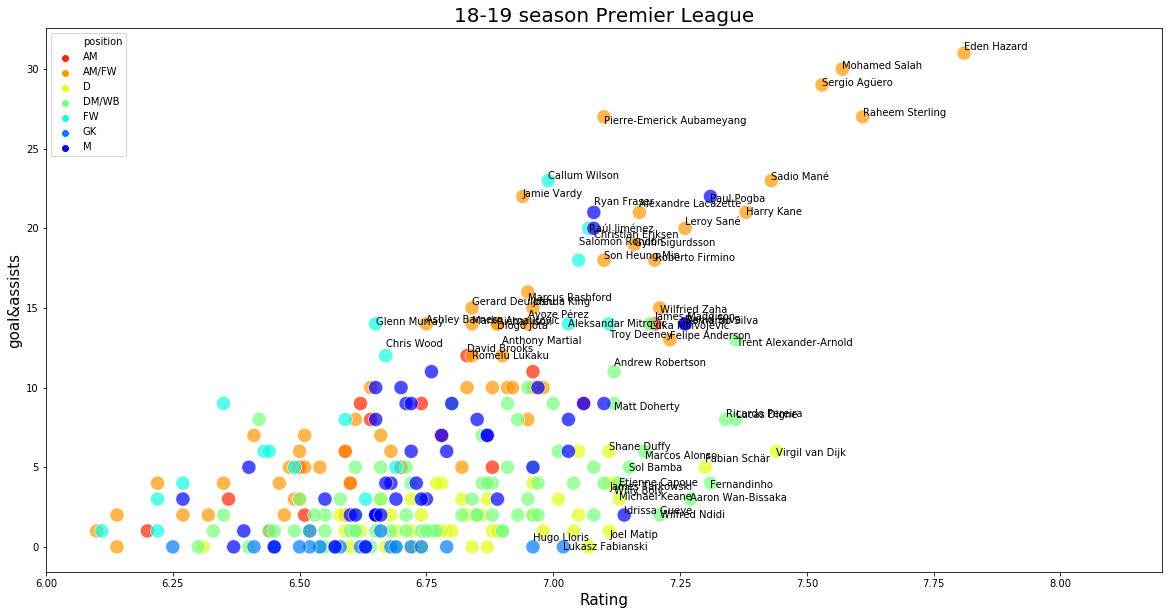

In [323]:
fig = plt.figure(figsize = (20,10))
sns.scatterplot(x='Rating', y='goal_assist', hue='position', palette = 'jet_r', data=df2, s=200, alpha=0.7)
for i in range(len(df2['player_name'])):
    if (df2['goal_assist'][i] >= 12) or (df2['Rating'][i]>7.1): 
        plt.text((df2['Rating'][i]),(df2['goal_assist'][i]+np.random.normal(0,0.35)),df2['player_name'][i])
    elif (df2['position'][i]=='GK') and (df2['Rating'][i]>6.8):
        plt.text((df2['Rating'][i]),(df2['goal_assist'][i]+np.random.normal(0,0.35)),df2['player_name'][i])
plt.title('18-19 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.xlim(6,8.2)
plt.ylabel('goal&assists',fontsize=15)
plt.xlabel('Rating',fontsize=15)
fig.savefig('18.19_PL.png')

In [324]:
df2

,player_name,team_number,team_name,Apps,Mins,Goals,Assists,Yel,Red,SpG,...,Drb,Blocks,OwnG,Dribble,Fouled,Off,Disp,UnsTch,sub,goal_assist
197,Alex Iwobi,13,Arsenal,22,1976,3,6,0,0,1.0,...,0.5,0.0,0,1.3,0.4,0.1,1.6,2.0,13,9
143,Jóhann Gudmundsson,184,Burnley,19,1749,3,6,2,0,1.1,...,0.6,0.1,0,0.6,0.8,0.1,1.0,1.4,10,9
131,Robert Snodgrass,29,West Ham,25,2224,2,5,10,0,0.9,...,1.0,0.1,0,1.0,1.5,0.1,1.3,1.8,8,7
209,Bernard,31,Everton,25,2129,1,3,5,0,0.7,...,1.2,0.1,0,1.2,0.8,0.1,1.2,2.2,9,4
211,Jesse Lingard,32,Man Utd,19,1670,4,2,3,0,1.2,...,0.8,0.1,0,0.5,0.9,0.3,0.7,1.6,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,James McArthur,162,Crystal Palace,36,3072,3,6,7,0,0.9,...,1.3,0.6,0,0.5,1.0,0.1,0.9,1.4,2,9
204,Aron Gunnarsson,188,Cardiff,27,2275,1,1,5,0,0.7,...,2.2,0.4,0,0.4,1.1,0.0,0.3,0.9,1,2
127,Solly March,211,Brighton,30,2475,1,5,1,0,1.2,...,0.7,0.1,0,1.4,0.9,0.2,1.2,1.3,5,6
41,Ryan Fraser,183,Bournemouth,35,3173,7,14,2,0,1.3,...,0.6,0.2,0,0.6,1.8,0.3,0.7,1.4,3,21


In [325]:
df.columns

Index(['player_name', 'team_number', 'team_name', 'age', 'position', 'Apps',
       'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB',
       'Rating', 'sub', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'goal_assist'],
      dtype='object')

In [326]:
df.AvgP

202    10.7
182    21.6
127    19.4
205    28.8
213    22.3
       ... 
39     39.1
165    45.4
246    29.3
98     29.4
31     61.9
Name: AvgP, Length: 276, dtype: float64

Text(0.5, 0, 'AvgP')

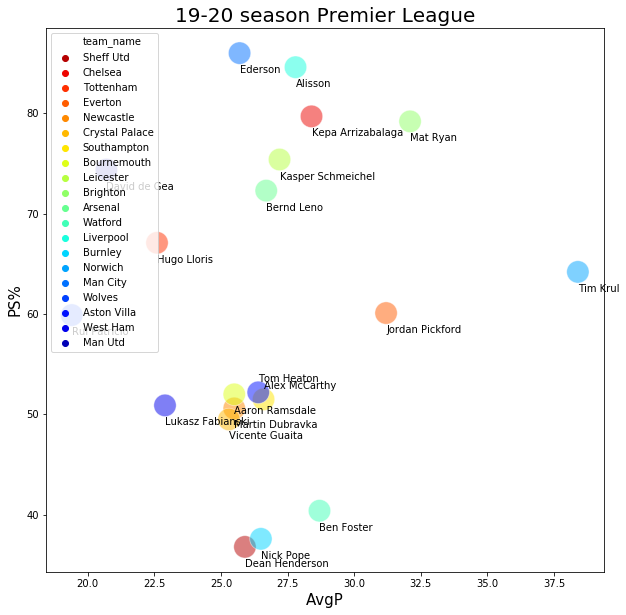

In [451]:
fig = plt.figure(figsize = (10,10))
temp_df = df[df['position']=='GK']
sns.scatterplot(x='AvgP', y='PS%', data=temp_df, s=500, alpha=0.5, hue='team_name',palette = 'jet_r')
for i in range(len(temp_df['player_name'])):
    if temp_df['player_name'].iloc[i] in ['Tom Heaton', 'Alex McCarthy'] :
        plt.text((temp_df['AvgP'].iloc[i]),(temp_df['PS%'].iloc[i]+1),temp_df['player_name'].iloc[i])        
    else : plt.text((temp_df['AvgP'].iloc[i]),(temp_df['PS%'].iloc[i]-2),temp_df['player_name'].iloc[i])
#   if (df['goal_assist'][i] >= 12) or (df['Rating'][i]>7.1): 
#       plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
#    elif (df['position'][i]=='GK') and (df['Rating'][i]>6.8):
#        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper left')
plt.ylabel('PS%',fontsize=15)
plt.xlabel('AvgP',fontsize=15)
#fig.savefig('19.20_PL_goalkeeper_kick.png')

In [360]:
df.columns

Index(['player_name', 'team_number', 'team_name', 'age', 'position', 'Apps',
       'Mins', 'Assists', 'KeyP', 'AvgP', 'PS%', 'Crosses', 'LongB', 'ThrB',
       'Rating', 'sub', 'Goals', 'Yel', 'Red', 'SpG', 'AerialsWon', 'MoM',
       'Dribble', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Tackles', 'Inter',
       'Fouls', 'Offsides', 'Clear', 'Drb', 'Blocks', 'OwnG', 'goal_assist'],
      dtype='object')

In [368]:
df[df['Goals']>=1]

,player_name,team_number,team_name,age,position,Apps,Mins,Assists,KeyP,AvgP,...,UnsTch,Tackles,Inter,Fouls,Offsides,Clear,Drb,Blocks,OwnG,goal_assist
202,Trézéguet,24,Aston Villa,25,AM,20,1951,1,0.6,10.7,...,2.1,1.1,0.7,1.0,0.0,0.4,1.0,0.1,0,7
182,Erik Lamela,30,Tottenham,28,AM,12,1212,1,0.7,21.6,...,1.0,1.0,0.3,1.2,0.0,0.4,0.8,0.1,0,3
127,Harvey Barnes,14,Leicester,22,AM,24,2094,8,1.0,19.4,...,1.6,0.4,0.2,0.6,0.0,0.1,0.5,0.1,0,14
205,Todd Cantwell,168,Norwich,22,AM,30,2504,2,0.9,28.8,...,2.1,1.4,0.5,0.9,0.0,0.8,1.3,0.1,0,8
213,Alex Iwobi,31,Everton,24,AM,19,1604,0,1.0,22.3,...,1.4,1.0,0.6,0.5,0.0,0.4,0.8,0.1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,Emiliano Buendía,168,Norwich,23,M,28,2465,7,2.3,39.1,...,2.3,2.3,0.6,1.0,0.0,0.7,2.2,0.1,0,8
165,Abdoulaye Doucouré,27,Watford,27,M,36,3167,2,1.0,45.4,...,1.6,1.7,0.8,1.4,0.0,0.8,1.1,0.2,1,6
246,Tom Davies,31,Everton,22,M,23,2057,0,0.2,29.3,...,0.9,1.3,1.2,1.0,0.0,0.9,1.3,0.1,0,1
98,Ross Barkley,15,Chelsea,26,M,13,1104,4,1.1,29.4,...,1.2,0.8,0.3,0.4,0.0,0.3,0.6,0.1,0,5


C:\Users\jaemini_man\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(0.2, 0.9)

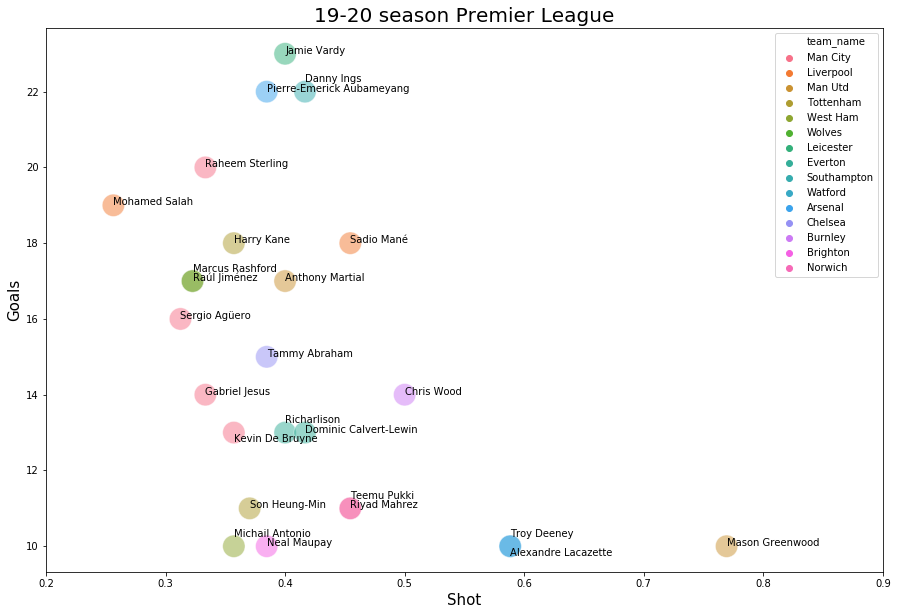

In [14]:
fig = plt.figure(figsize = (15,10))
temp_df = df[df['Goals']>=10]
temp_df['Shot'] = 1/temp_df['SpG']
sns.scatterplot(x='Shot', y='Goals', hue='team_name', data=temp_df, s=500, alpha=0.5, label =None)
for i in range(len(temp_df['player_name'])):
    if temp_df['player_name'].iloc[i] in ['Danny Ings', 'Marcus Rashford', 'Richarlison','Teemu Pukki','Troy Deeney',
                                          'Michail Antonio']:
        plt.text((temp_df['Shot'].iloc[i]),(temp_df['Goals'].iloc[i]
                                            +0.25),temp_df['player_name'].iloc[i])
    elif temp_df['player_name'].iloc[i] in ['Kevin De Bruyne','Alexandre Lacazette']:
         plt.text((temp_df['Shot'].iloc[i]),(temp_df['Goals'].iloc[i]
                                            -0.25),temp_df['player_name'].iloc[i])
    else : plt.text((temp_df['Shot'].iloc[i]),(temp_df['Goals'].iloc[i]),temp_df['player_name'].iloc[i])
#   if (df['goal_assist'][i] >= 12) or (df['Rating'][i]>7.1): 
#       plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
#    elif (df['position'][i]=='GK') and (df['Rating'][i]>6.8):
#        plt.text((df['Rating'][i]),(df['goal_assist'][i]+np.random.normal(0,0.35)),df['player_name'][i])
plt.title('19-20 season Premier League', fontsize=20)
plt.legend(loc='upper right')
plt.ylabel('Goals',fontsize=15)
plt.xlabel('Shot',fontsize=15)
plt.xlim((0.2,0.9))

In [15]:
fig.savefig('19.20_PL_forward_kick.png')